Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd


Loading the dataset

In [3]:
df = pd.read_csv('C:\\Users\\pansa\\Datasets\\tweets\\data_science.csv', dtype={'place': str})


In [4]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.406400e+18,1.406400e+18,2021-06-20 05:26:01 IST,20-06-2021,05:26:01,530,1.113750e+18,ballouxfrancois,Prof Francois Balloux,What can be done? - Never blindly trust an ab...,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.406390e+18,1.406390e+18,2021-06-20 04:46:01 IST,20-06-2021,04:46:01,530,7.888990e+17,tdatascience,Towards Data Science,"""We need a paradigm shift from model-centric t...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.406390e+18,1.406390e+18,2021-06-20 04:30:00 IST,20-06-2021,04:30:00,530,1.940224e+07,sciencenews,Science News,Using high-resolution satellite data and compu...,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.406380e+18,1.406380e+18,2021-06-20 04:19:01 IST,20-06-2021,04:19:01,530,7.888990e+17,tdatascience,Towards Data Science,.@Stephenson_Data shares four steps that will ...,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.406360e+18,1.406360e+18,2021-06-20 02:40:01 IST,20-06-2021,02:40:01,530,7.888990e+17,tdatascience,Towards Data Science,"""Curricula is inherently brittle in a world wh...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                    0
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet                 0
quote_url          231065
video                   0
thumbnail          131048
near               241386
geo                241386
source             241386
user_rt_id         241386
user_rt            241386
retweet_id         241386
reply_to                0
retweet_date       241386
translate          241386
trans_src          241386
trans_dest         241386
dtype: int64

In [6]:
cols_to_drop = [
    'conversation_id', 'user_id', 'name', 'timezone',
    'quote_url', 'link', 'thumbnail', 'video',
    'retweet_date', 'translate', 'trans_src', 'trans_dest',
    'near', 'geo', 'source',
    'user_rt_id', 'user_rt', 'retweet_id'
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')


In [7]:
df.isnull().sum()

id                0
created_at        0
date              0
time              0
username          0
tweet             0
language          0
mentions          0
urls              0
photos            0
replies_count     0
retweets_count    0
likes_count       0
hashtags          0
cashtags          0
retweet           0
reply_to          0
dtype: int64

In [8]:
df['tweet'][10]

'Trends in #AI for next 5 years, including revenue, applications, and talent (#INFOGRAPHIC) ——————— #BigData #DataScience #MachineLearning #DeepLearning #ComputerVision #NLProc #DataLiteracy #AIStrategy #DigitalTransformation #EdgeAI #Edge #IoT #IIoT #IoTPL #IoTCommunity  https://t.co/mn7vFSgyyv'

In [26]:
!pip install nltk


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:

import nltk 
nltk.download('vader_lexicon')
import re
import pandas as pd 
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pansa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pansa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [29]:
!pip install nltk spacy pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.4 MB/s eta 0:00:09
     -- ------------------------------------- 0.8/12.8 MB 1.5 MB/s eta 0:00:08
     --- ------------------------------------ 1.0/12.8 MB 1.1 MB/s eta 0:00:11
     ---- ----------------------------------- 1.3/12.8 MB 1.2 MB/s eta 0:00:10
     ---- ----------------------------------- 1.6/12.8 MB 1.3 MB/s eta 0:00:09
     ----- ---------------------------------- 1.8/12.8 MB 1.2 MB/s eta 0:00:10
     ------ --------------------------------- 2.1/12.8 MB 1.2 MB/s eta 0:00:09
     -------- ------------------------------- 2.6/12.8 MB 1.3 MB/s eta 0:00:08
     --------- ------------------------------ 3.1/12.8 MB 1.4 MB/s eta 0:00:07
 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")

def	cleaner(tweet):
    tweet	=	re.sub("@[A-Za-z0-9]+",	"",	tweet)
    tweet	=	re.sub(r"(?:\@|http?\://|https?\://|www)\S+",	"",	tweet)
    tweet	=	"	".join(tweet.split())
    tweet	=	tweet.replace("#",	"").replace("_",	"	")
    tweet	=	"	".join(w	for	w	in	nltk.wordpunct_tokenize(tweet)	if	w.lower()	in	words	or	not	w.isalpha())
    return	tweet
df['tweet_clean']	=	df['tweet'].apply(cleaner)

In [14]:
word_dict = {
    'manipulate': -1,
    'manipulative': -1,
    'jamescharlesiscancelled': -1,
    'jamescharlesisoverparty': -1,
    'pedophile': -1,
    'pedo': -1,
    'cancel': -1,
    'cancelled': -1,
    'cancel culture': 0.4,
    'teamtati': -1,
    'teamjames': 1,
    'teamjamescharles': 1,
    'liar': -1
}


In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid	=	SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)
list1	=	[]
for	i	in	df['tweet_clean']:
    list1.append(sid.polarity_scores(str(i))['compound'])

In [16]:
df['sentiment']	=	pd.Series(list1)

def	sentiment_category(sentiment):
    if	sentiment	>	0:
        return 'positive'
    elif	sentiment	==	0:
        return 'neutral'
    else:
        return 'negative'
df['sentiment_category']	=	df['sentiment'].apply(sentiment_category)

In [17]:
df	=	df[['tweet',	'date',	'id',	'sentiment',	'sentiment_category']]
df.head()

,tweet,date,id,sentiment,sentiment_category
0,What can be done? - Never blindly trust an ab...,20-06-2021,1.406400e+18,-0.4592,negative
1,"""We need a paradigm shift from model-centric t...",20-06-2021,1.406390e+18,-0.3535,negative
2,Using high-resolution satellite data and compu...,20-06-2021,1.406390e+18,0.0000,neutral
3,.@Stephenson_Data shares four steps that will ...,20-06-2021,1.406380e+18,0.6249,positive
4,"""Curricula is inherently brittle in a world wh...",20-06-2021,1.406360e+18,0.2960,positive


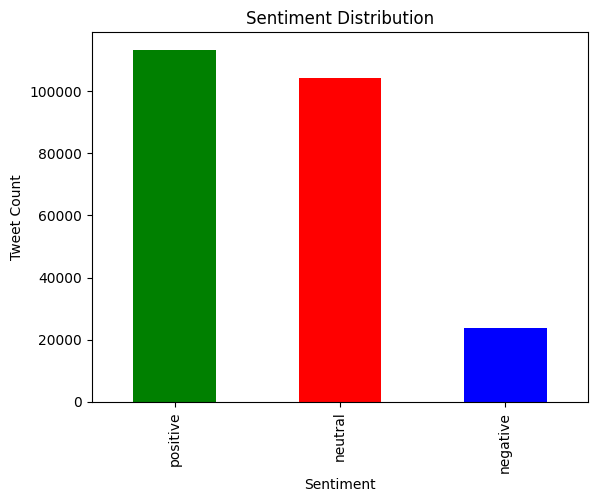

In [18]:
import matplotlib.pyplot as plt
df['sentiment_category'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


In [20]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


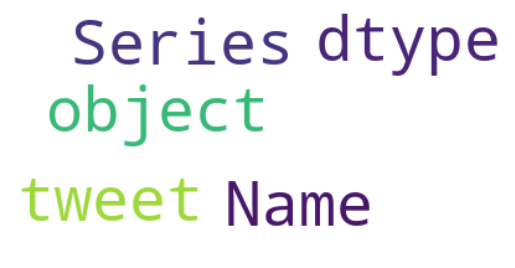

In [21]:
import	matplotlib.pyplot	as	plt
from wordcloud	import	WordCloud
df2	=df[(df['date']>='2019-05-11')	&	(df['date']<='2019-05-14')]
positive=df2[df2['sentiment_category']=='positive']
wordcloud=WordCloud(max_font_size=50,	max_words=500,	background_color="white").generate(str(positive['tweet']))
plt.figure()
plt.imshow(wordcloud,	interpolation="bilinear")
plt.axis("off")
plt.show()